[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ISAT-DrG/ISAT_420_S26_Shared/blob/main/W3_Tools_And_Workflow_Demo/Code/w3_jupyter_notebook_demonstration.ipynb)

# Jupyter Notebook Example

I am using this notebook to demonstrate a possible workflow and to demonstrate the capabilities. 

I am not expecting you to know and remember all these commands, that comes later in the semester. 

**Learning Goals**

- Understand that notebooks allow for good working practices and reproducible code
- Experience some of the capabilities including
    - coding
    - annotating your work
    - making figures 

## A Standard Workflow

We typically begin with loading the python libaries that we need. 

In this case we need **pandas**, which is a library to organize data in tabular format and **matplotlib** to help with the visualization. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read In Your Data 

Pandas can ready many different data formats, including Excel. I am telling pandas here to read me the data from the Exel file into a dataframe variabl called `df`. Because the Excel file contains more than one sheet and I only want the data, I am telling pandas exactly what to read. 

In [ ]:
df = pd.read_excel('../Raw_Data/Global_Carbon_Budget_2025_v0.7.xlsx',
                   sheet_name='Global Carbon Budget',
                   skiprows=21, index_col= 'Year', 
                   engine = 'openpyxl',
                  usecols = 'A:H')

# location of data if using google colab
# https://github.com/ISAT-DrG/ISAT_420_S26_Shared/raw/refs/heads/main/W3_Tools_And_Workflow_Demo/Raw_Data/Global_Carbon_Budget_2023v1.0.xlsx

We an confirm that we were able to read the data. 

In [3]:
df

,fossil emissions excluding carbonation,land-use change emissions,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
Year,,,,,,,
1959,2.416665,2.121527,2.03904,0.992420,0.430359,0.012542,1.063831
1960,2.561796,1.864403,1.50804,0.936514,1.252347,0.013682,0.715617
1961,2.569428,1.787483,1.65672,0.839509,0.899620,0.014548,0.946515
1962,2.660086,1.657757,1.18944,0.923603,1.293962,0.015680,0.895158
1963,2.801869,1.604057,1.21068,1.111698,0.959732,0.016653,1.107163
...,...,...,...,...,...,...,...
2018,10.034647,1.169527,5.07636,2.907491,3.604710,0.198196,-0.582584
2019,10.109199,1.254780,5.31000,2.955932,3.009866,0.201583,-0.113403
2020,9.554514,1.172267,4.97016,2.914365,3.110044,0.206858,-0.474646


I can look at individual columns by their name, like this:

In [4]:
df['fossil emissions excluding carbonation']

Year
1959     2.416665
1960     2.561796
1961     2.569428
1962     2.660086
1963     2.801869
          ...    
2018    10.034647
2019    10.109199
2020     9.554514
2021    10.048183
2022    10.139133
Name: fossil emissions excluding carbonation, Length: 64, dtype: float64

I can look at rows using the index, which I selected to be the `Year` column in the spread-sheet. This is done, by specifiying the location using the `.loc[]` method. 

In [5]:
df.loc[1960:1970]

,fossil emissions excluding carbonation,land-use change emissions,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
Year,,,,,,,
1960,2.561796,1.864403,1.50804,0.936514,1.252347,0.013682,0.715617
1961,2.569428,1.787483,1.65672,0.839509,0.899620,0.014548,0.946515
1962,2.660086,1.657757,1.18944,0.923603,1.293962,0.015680,0.895158
1963,2.801869,1.604057,1.21068,1.111698,0.959732,0.016653,1.107163
1964,2.954044,1.565253,1.04076,1.229492,1.644886,0.018220,0.585939
1965,3.086706,1.420730,2.33640,1.337887,0.366636,0.019233,0.447280
1966,3.237366,1.374057,2.33640,1.268381,1.563294,0.020643,-0.577295
1967,3.339609,1.411203,1.29564,1.110076,1.730973,0.021657,0.592468
1968,3.521926,1.428043,2.10276,1.200970,2.485632,0.023210,-0.862603


# Doing Calculations

After reading the data, can use it for any purpose. In our case, we want to visualize the balance with sources and sinks.

Let's assume that sources are positive and sinks are negative. 
This means, I have to turn all sinks *ocean sink*, *land-sink*, *atmosphere* into negative numbers.  

I am resaving them into my dataframe like this:

In [6]:
df['ocean sink']=df['ocean sink']*-1
df['land sink']=df['land sink']*-1
df['atmospheric growth']=df['atmospheric growth']*-1

df.head() # head displays the first few rows

,fossil emissions excluding carbonation,land-use change emissions,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
Year,,,,,,,
1959,2.416665,2.121527,-2.03904,-0.992420,-0.430359,0.012542,1.063831
1960,2.561796,1.864403,-1.50804,-0.936514,-1.252347,0.013682,0.715617
1961,2.569428,1.787483,-1.65672,-0.839509,-0.899620,0.014548,0.946515
1962,2.660086,1.657757,-1.18944,-0.923603,-1.293962,0.015680,0.895158
1963,2.801869,1.604057,-1.21068,-1.111698,-0.959732,0.016653,1.107163


# Visualization & Communication

Lastly, I can plot my data. 

What I am doing here is a bit complicated, but in essence I am making two plots. One for sources and one for sinks. 

I could spend lots of time to make this much closer to the original if I wanted to by 

1. moving panels together
2. changing colors
3. changing legends
4. ... 

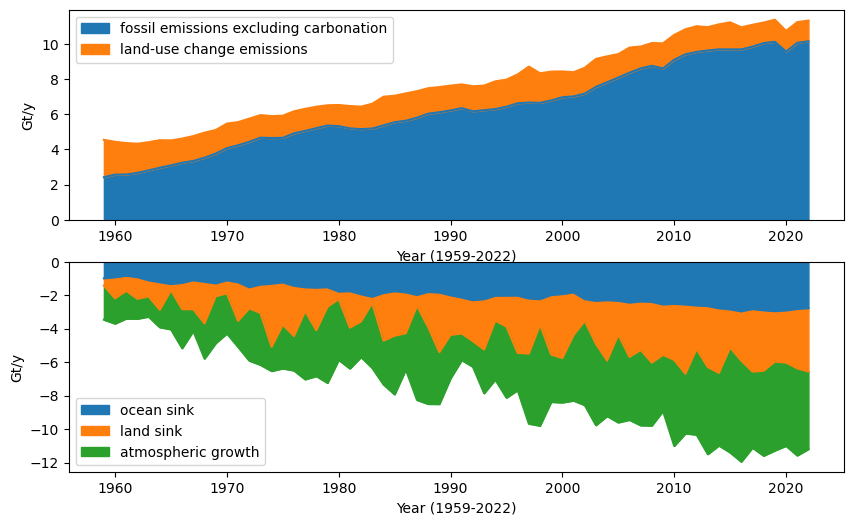

In [8]:
fig, ax = plt.subplots(2,1,figsize=(10, 6))

df[['fossil emissions excluding carbonation','land-use change emissions']].plot.area(
    stacked=True,ax=ax[0], ylabel='Gt/y', xlabel = 'Year (1959-2024)')
df[['ocean sink','land sink','atmospheric growth']].plot.area(
    stacked=True,ax=ax[1], ylabel='Gt/y', xlabel = 'Year (1959-2024)')


# Save our result
plt.savefig('../Results/Global_Carbon_Budget_2025.png')

**One important note: I never change the data in the Excel sheet. All data analysis was done in the copy**

**As a general rule: NEVER overwrite your raw data!**